In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

data = pd.read_csv('/content/displacement_data.csv')
dfx= data[["x","y","u_x"]]
dfy= data[["x","y","u_y"]]



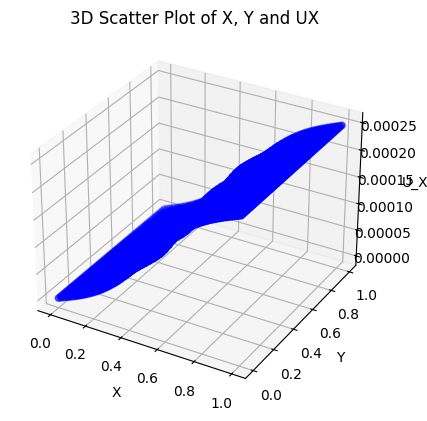

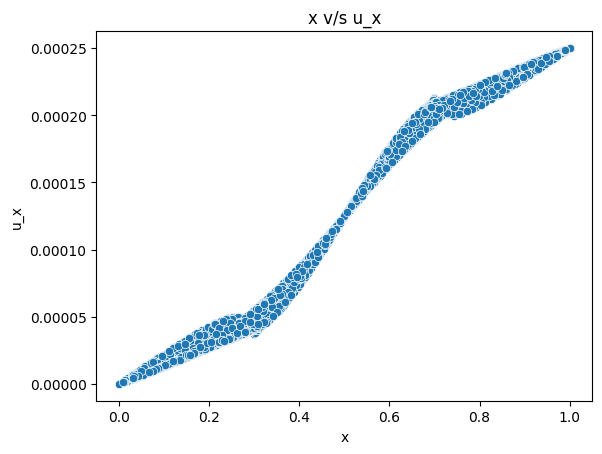

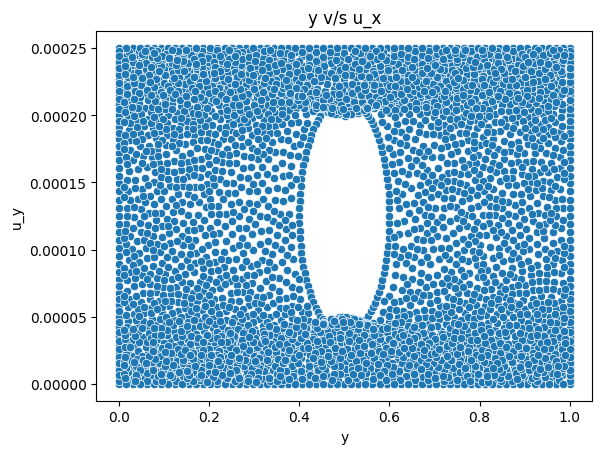

In [2]:
x1 = dfx[['x', 'y']]
y1 = dfx['u_x']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfx['x'], dfx['y'], dfx['u_x'], c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U_X')
plt.title("3D Scatter Plot of X, Y and UX")
plt.show()

sns.scatterplot(x="x",y="u_x",data=dfx)
plt.title("x v/s u_x")
plt.xlabel("x")
plt.ylabel("u_x")
plt.show()

sns.scatterplot(x="y",y="u_x",data=dfx)
plt.title("y v/s u_x")
plt.xlabel("y")
plt.ylabel("u_y")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


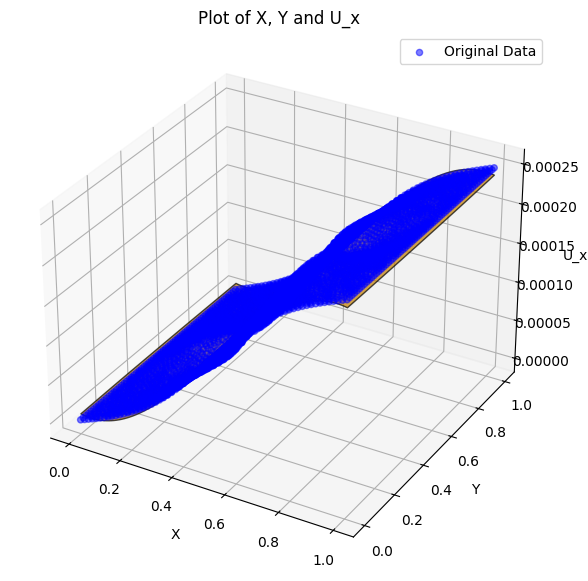

Mean Squared Error: 4.370743975156152e-11


In [8]:
degree = 3
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(x1)
model_x = LinearRegression()
model_x.fit(X_poly,y1)
x_range = np.linspace(dfx['x'].min(), dfx['x'].max(), 100)
y_range = np.linspace(dfx['y'].min(), dfx['y'].max(), 100)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
X_grid_poly = poly.transform(np.c_[X_grid.ravel(), Y_grid.ravel()])
Z_grid = model_x.predict(X_grid_poly).reshape(X_grid.shape)

# Plot the original data and the polynomial plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the original scatter data
ax.scatter(dfx['x'], dfx['y'], dfx['u_x'], color='blue', alpha=0.5, label="Original Data")

# Plot the polynomial plane
ax.plot_surface(X_grid, Y_grid, Z_grid, color='orange', alpha=0.7, rstride=100, cstride=100, edgecolor='k')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U_x')
ax.set_title('Plot of X, Y and U_x')

plt.legend()
plt.show()
u_x_pred = model_x.predict(X_poly)
print("Mean Squared Error:", mean_squared_error(y1, u_x_pred))

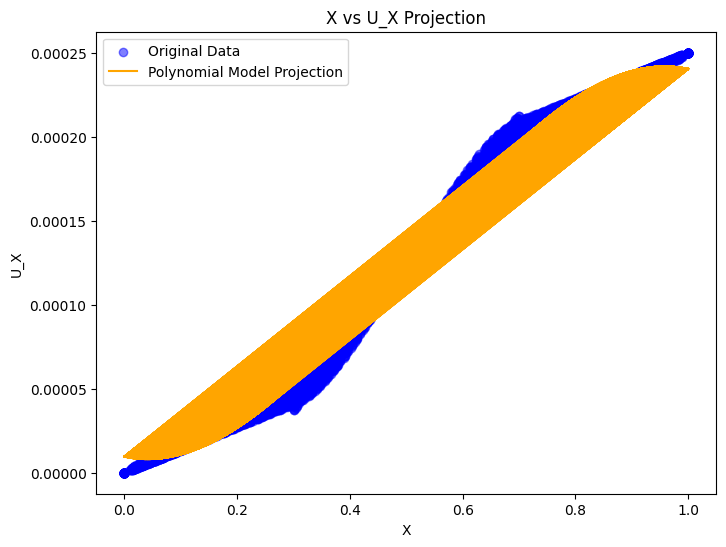

In [9]:
# Define a fixed value for y (e.g., the mean of y)
y_fixed = np.full_like(dfx['x'], dfx['y'].mean())

# Create a DataFrame with varying x and fixed y
X_x_projection = pd.DataFrame({'x': dfx['x'], 'y': y_fixed})
X_x_projection_poly = poly.transform(X_x_projection)  # Transform for polynomial terms

# Predict u_y along x-axis using the fixed y value
u_y_x_projection = model_x.predict(X_x_projection_poly)

# Plot the original data projection along the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(dfx['x'], dfx['u_x'], color='blue', alpha=0.5, label='Original Data')
plt.plot(dfx['x'], u_y_x_projection, color='orange', label='Polynomial Model Projection')
plt.xlabel('X')
plt.ylabel('U_X')
plt.title('X vs U_X Projection')
plt.legend()
plt.show()

In [10]:
# Extract terms and construct the polynomial equation string
coefficients_x = model_x.coef_
print(coefficients_x)
intercept_x = model_x.intercept_
print(intercept_x)
terms = poly.get_feature_names_out(['x', 'y'])
equation = f"{intercept_x} "  # Start with the intercept

for coef, term in zip(coefficients_x[1:], terms[1:]):  # Skip the first term as it corresponds to the intercept
    equation += f"+ ({coef}) * {term} "

print("Polynomial Regression Equation for u_x:")
print(equation)

[ 0.00000000e+00 -6.84884216e-05  4.52592461e-06  9.05295434e-04
 -8.83532967e-06 -5.30562790e-06 -6.04113774e-04  1.62172312e-06
  6.97569233e-06  1.42521744e-06]
8.460540936082437e-06
Polynomial Regression Equation for u_x:
8.460540936082437e-06 + (-6.848842155234383e-05) * x + (4.525924607056562e-06) * y + (0.0009052954339239371) * x^2 + (-8.835329667708504e-06) * x y + (-5.305627904812533e-06) * y^2 + (-0.000604113774394459) * x^3 + (1.6217231226933467e-06) * x^2 y + (6.975692333959068e-06) * x y^2 + (1.4252174363363996e-06) * y^3 


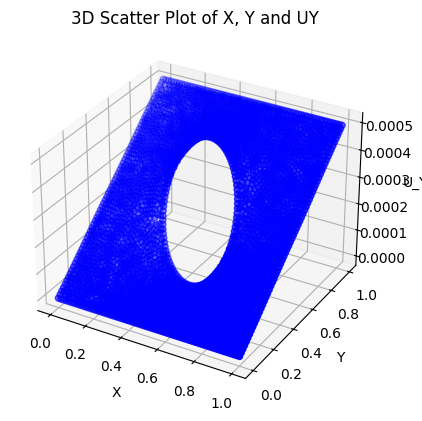

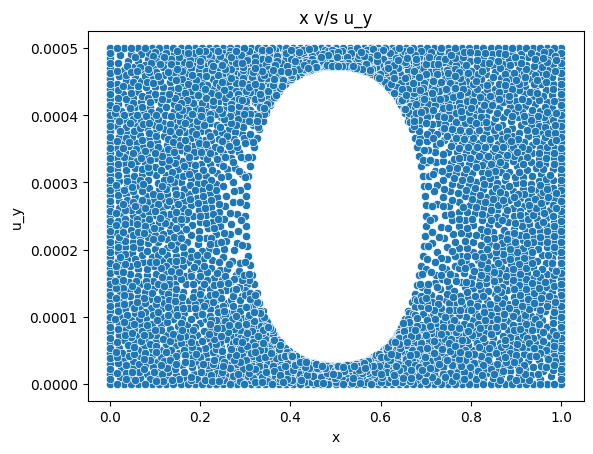

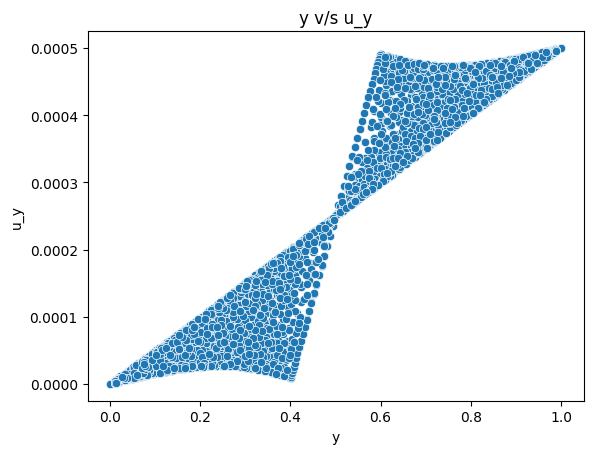

In [11]:
x2 = dfy[['x', 'y']]
y2 = dfy['u_y']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfy['x'], dfy['y'], dfy['u_y'], c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U_Y')
plt.title("3D Scatter Plot of X, Y and UY")
plt.show()

sns.scatterplot(x="x",y="u_y",data=dfy)
plt.title("x v/s u_y")
plt.xlabel("x")
plt.ylabel("u_y")
plt.show()

sns.scatterplot(x="y",y="u_y",data=dfy)
plt.title("y v/s u_y")
plt.xlabel("y")
plt.ylabel("u_y")
plt.show()

In [12]:
degree = 3
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(x2)

# Fit a linear regression model on the transformed features
model_y = LinearRegression()
model_y.fit(X_poly, y2)

# Predict u_y values for original X
u_y_pred = model_y.predict(X_poly)

# Print model coefficients
print("Polynomial Coefficients:", model_y.coef_)
print("Intercept:", model_y.intercept_)
print("Mean Squared Error:", mean_squared_error(y2, u_y_pred))
coefficients_y = model_y.coef_
intercept_y = model_y.intercept_
terms = poly.get_feature_names_out(['x', 'y'])
equation = f"{intercept_y} "  # Start with the intercept

for coef, term in zip(coefficients_y[1:], terms[1:]):  # Skip the first term as it corresponds to the intercept
    equation += f"+ ({coef}) * {term} "

print("Polynomial Regression Equation for u_y:")
print(equation)

Polynomial Coefficients: [ 0.00000000e+00 -3.70363452e-04 -2.72410585e-04  3.69608397e-04
  7.47060063e-04  1.82211430e-03  3.08186846e-06 -7.53188828e-04
  6.29740827e-06 -1.21642074e-03]
Intercept: 8.202013844248461e-05
Mean Squared Error: 1.3275583407638332e-09
Polynomial Regression Equation for u_y:
8.202013844248461e-05 + (-0.00037036345175428444) * x + (-0.00027241058504434164) * y + (0.00036960839708307964) * x^2 + (0.0007470600625728789) * x y + (0.0018221143010444876) * y^2 + (3.0818684579309014e-06) * x^3 + (-0.0007531888275400206) * x^2 y + (6.297408271846958e-06) * x y^2 + (-0.0012164207378863269) * y^3 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


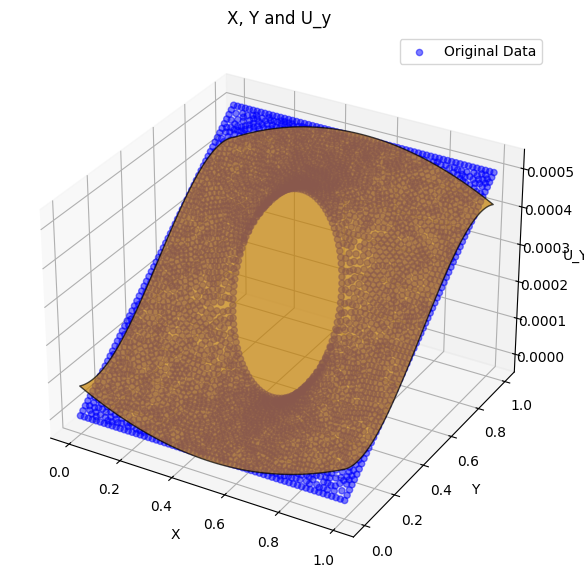

In [14]:
x_range = np.linspace(dfy['x'].min(), dfy['x'].max(), 100)
y_range = np.linspace(dfy['y'].min(), dfy['y'].max(), 100)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
X_grid_poly = poly.transform(np.c_[X_grid.ravel(), Y_grid.ravel()])
Z_grid = model_y.predict(X_grid_poly).reshape(X_grid.shape)

# Plot the original data and the polynomial plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the original scatter data
ax.scatter(dfy['x'], dfy['y'], dfy['u_y'], color='blue', alpha=0.5, label="Original Data")

# Plot the polynomial plane
ax.plot_surface(X_grid, Y_grid, Z_grid, color='orange', alpha=0.7, rstride=100, cstride=100, edgecolor='k')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U_Y')
ax.set_title('X, Y and U_y')


plt.legend()
plt.show()

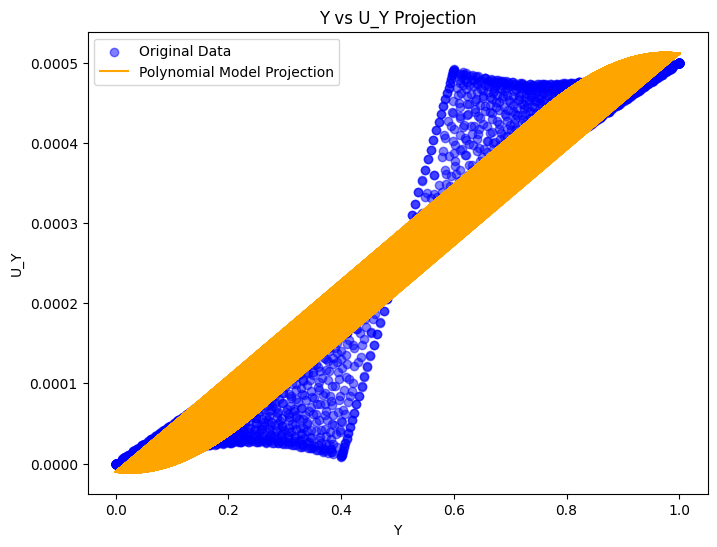

In [15]:
x_fixed = np.full_like(dfy['y'], dfy['x'].mean())

# Create a DataFrame with fixed x and varying y
X_y_projection = pd.DataFrame({'x': x_fixed, 'y': dfy['y']})
X_y_projection_poly = poly.transform(X_y_projection)  # Transform for polynomial terms

# Predict u_y along y-axis using the fixed x value
u_y_y_projection = model_y.predict(X_y_projection_poly)

# Plot the original data projection along the y-axis
plt.figure(figsize=(8, 6))
plt.scatter(dfy['y'], dfy['u_y'], color='blue', alpha=0.5, label='Original Data')
plt.plot(dfy['y'], u_y_y_projection, color='orange', label='Polynomial Model Projection')
plt.xlabel('Y')
plt.ylabel('U_Y')
plt.title('Y vs U_Y Projection')
plt.legend()
plt.show()

In [16]:
from sympy import symbols, diff
x,y = symbols('x y')
ux=(
    intercept_x+
    coefficients_x[1]*x+
    coefficients_x[2]*y+
    coefficients_x[3]*x**2+
    coefficients_x[4]*x*y+
    coefficients_x[5]*y**2+
    coefficients_x[6]*x**3+
    coefficients_x[7]*x**2*y+
    coefficients_x[8]*x*y**2+
    coefficients_x[9]*y**3
)
print(ux)

-0.000604113774394459*x**3 + 1.62172312269335e-6*x**2*y + 0.000905295433923937*x**2 + 6.97569233395907e-6*x*y**2 - 8.8353296677085e-6*x*y - 6.84884215523438e-5*x + 1.4252174363364e-6*y**3 - 5.30562790481253e-6*y**2 + 4.52592460705656e-6*y + 8.46054093608244e-6


In [17]:
uy=(
    intercept_y+
    coefficients_y[1]*x+
    coefficients_y[2]*y+
    coefficients_y[3]*x**2+
    coefficients_y[4]*x*y+
    coefficients_y[5]*y**2+
    coefficients_y[6]*x**3+
    coefficients_y[7]*x**2*y+
    coefficients_y[8]*x*y**2+
    coefficients_y[9]*y**3
)
print(uy)

3.0818684579309e-6*x**3 - 0.000753188827540021*x**2*y + 0.00036960839708308*x**2 + 6.29740827184696e-6*x*y**2 + 0.000747060062572879*x*y - 0.000370363451754284*x - 0.00121642073788633*y**3 + 0.00182211430104449*y**2 - 0.000272410585044342*y + 8.20201384424846e-5


In [18]:
exx_1=diff(ux,x)
eyy_1=diff(uy,y)
exx = sum(term for term in exx_1.as_ordered_terms() if term.has(x, y))
eyy = sum(term for term in eyy_1.as_ordered_terms() if term.has(x, y))
print(exx)
print(eyy)

-0.00181234132318338*x**2 + 3.24344624538669e-6*x*y + 0.00181059086784787*x + 6.97569233395907e-6*y**2 - 8.8353296677085e-6*y
-0.000753188827540021*x**2 + 1.25948165436939e-5*x*y + 0.000747060062572879*x - 0.00364926221365898*y**2 + 0.00364422860208898*y


In [19]:
s_xx_lambda= sum([exx,eyy])
s_yy_lambda= s_xx_lambda
s_xx_mew= 2*exx
s_yy_mew= 2*eyy

print(s_xx_lambda)
print(s_yy_lambda)
print(s_xx_mew)
print(s_yy_mew)

-0.0025655301507234*x**2 + 1.58382627890806e-5*x*y + 0.00255765093042075*x - 0.00364228652132502*y**2 + 0.00363539327242127*y
-0.0025655301507234*x**2 + 1.58382627890806e-5*x*y + 0.00255765093042075*x - 0.00364228652132502*y**2 + 0.00363539327242127*y
-0.00362468264636675*x**2 + 6.48689249077339e-6*x*y + 0.00362118173569575*x + 1.39513846679181e-5*y**2 - 1.7670659335417e-5*y
-0.00150637765508004*x**2 + 2.51896330873878e-5*x*y + 0.00149412012514576*x - 0.00729852442731796*y**2 + 0.00728845720417795*y


In [20]:
R_x_1=s_xx_lambda.subs(x,1)
R_x_2=s_xx_mew.subs(x,1)
print(R_x_1,R_x_2)

-0.00364228652132502*y**2 + 0.00365123153521035*y - 7.87922030264432e-6 1.39513846679181e-5*y**2 - 1.11837668446436e-5*y - 3.50091067100565e-6


In [21]:
from sympy import integrate
R_x_lambda=integrate(R_x_1, (y, 0, 1))
R_x_mew=integrate(R_x_2, (y, 0, 1))
print(R_x_lambda)
print(R_x_mew)

0.000603641040194189
-4.44233253735475e-6


In [22]:
R_y_1=s_yy_lambda.subs(y,1)
R_y_2=s_yy_mew.subs(y,1)
R_y_lambda=integrate(R_y_1, (x, 0, 1))
R_y_mew=integrate(R_y_2, (x, 0, 1))
print(R_y_lambda)
print(R_y_mew)


0.000424674630793363
0.000247461770949882


In [23]:
Reaction = pd.read_csv('/content/reaction_data.csv')
Reaction.head()

,Reaction,Value
0,R3,-106597287.3
1,R4,106597287.3
2,R1,-126885800.9
3,R2,126885800.9


In [24]:
R_x=Reaction.iloc[1,1]
R_y=Reaction.iloc[3,1]
C=np.array([R_x,R_y],dtype = float)
print(C)

[1.06597287e+08 1.26885801e+08]


In [25]:
A=np.array([[R_x_lambda,R_x_mew],[R_y_lambda,R_y_mew]],dtype = float)
print(A)

[[ 6.03641040e-04 -4.44233254e-06]
 [ 4.24674631e-04  2.47461771e-04]]


In [26]:
l= np.linalg.solve(A, C)
print(f"Lame's constants are:- {l}")

Lame's constants are:- [1.78114494e+11 2.07082871e+11]


In [27]:
s_xx= l[0]*s_xx_lambda+(l[1]*s_xx_mew)
s_yy= l[0]*s_yy_lambda+(l[1]*s_yy_mew)
from sympy import lambdify
s_x= lambdify((x,y),s_xx)
s_y = lambdify((x,y),s_yy)
e_x= lambdify((x,y),exx)
e_y = lambdify((x,y),eyy)
data['stress_x'] = np.vectorize(s_x)(data['x'], data['y'])
data['stress_y'] = np.vectorize(s_y)(data['x'], data['y'])
data['e_x'] = np.vectorize(e_x)(data['x'], data['y'])
data['e_y'] = np.vectorize(e_y)(data['x'], data['y'])

data.head()

,x,y,u_x,u_y,stress_x,stress_y,e_x,e_y
0,0.000000,1.000000,0.000000,0.000500,-1.997986e+06,-3.312537e+06,-1.859637e-06,-0.000005
1,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2,1.000000,0.000000,0.000250,0.000000,-2.128382e+06,-3.941728e+06,-1.750455e-06,-0.000006
3,1.000000,1.000000,0.000250,0.000500,3.798090e+04,7.831009e+05,-3.666464e-07,0.000001
4,0.699605,0.506279,0.000211,0.000266,4.141924e+08,6.999537e+08,3.781165e-04,0.001068


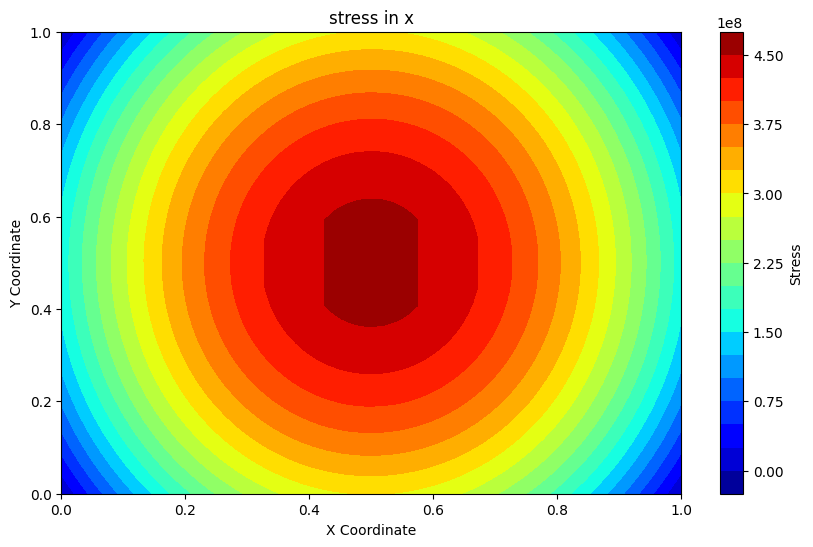

In [28]:
plt.figure(figsize=(10, 6))
contour = plt.tricontourf(data['x'], data['y'], data['stress_x'], levels=20, cmap="jet")

# Step 2: Add a color bar for reference
cbar = plt.colorbar(contour)
cbar.set_label("Stress")

# Optional: Add labels, title, etc.
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("stress in x")

plt.show()

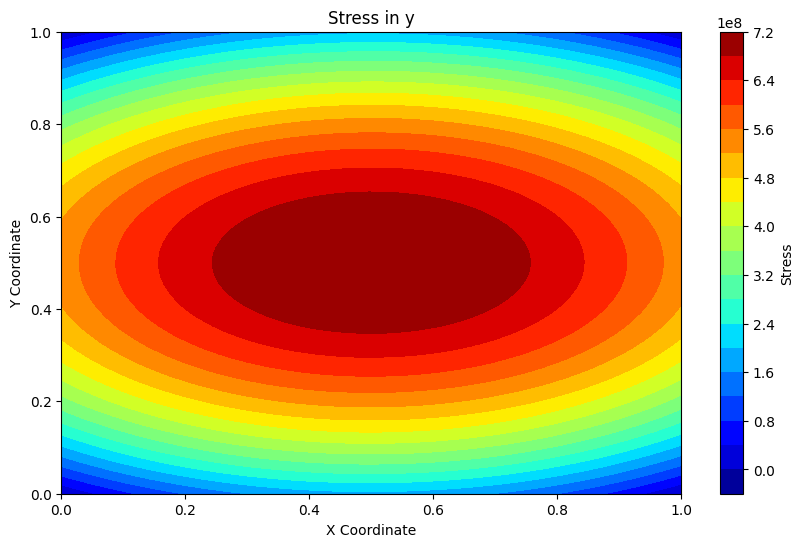

In [29]:
plt.figure(figsize=(10, 6))
contour = plt.tricontourf(data['x'], data['y'], data['stress_y'], levels=20, cmap="jet")

# Step 2: Add a color bar for reference
cbar = plt.colorbar(contour)
cbar.set_label("Stress")

# Optional: Add labels, title, etc.
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Stress in y")

plt.show()

In [30]:
Txy=(l[1])*(diff(ux,y)+diff(uy,x))
T_xy=lambdify((x,y),Txy)
data['Txy'] = np.vectorize(T_xy)(data['x'], data['y'])
data.head()

,x,y,u_x,u_y,stress_x,stress_y,e_x,e_y,Txy
0,0.000000,1.000000,0.000000,0.000500,-1.997986e+06,-3.312537e+06,-1.859637e-06,-0.000005,7.893675e+07
1,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-7.575869e+07
2,1.000000,0.000000,0.000250,0.000000,-2.128382e+06,-3.941728e+06,-1.750455e-06,-0.000006,7.774124e+07
3,1.000000,1.000000,0.000250,0.000500,3.798090e+04,7.831009e+05,-3.666464e-07,0.000001,-7.661924e+07
4,0.699605,0.506279,0.000211,0.000266,4.141924e+08,6.999537e+08,3.781165e-04,0.001068,-5.367180e+05


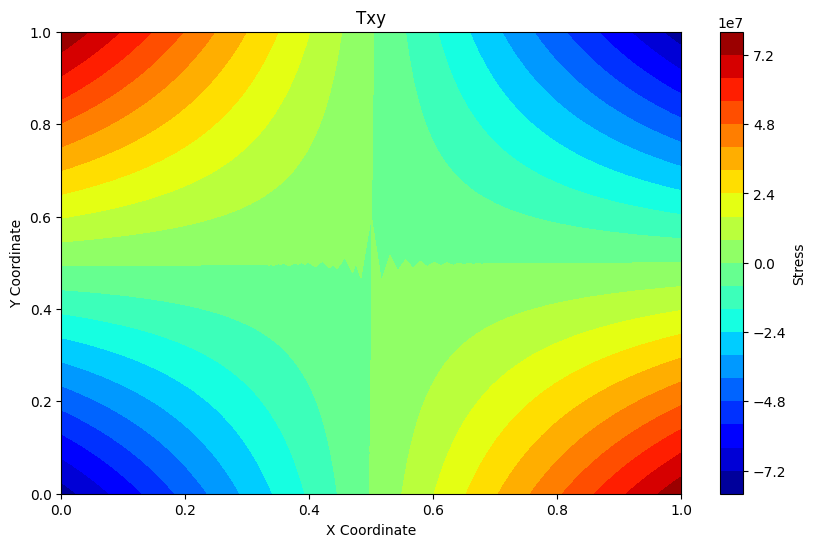

In [31]:
plt.figure(figsize=(10, 6))
contour = plt.tricontourf(data['x'], data['y'], data['Txy'], levels=20, cmap="jet")

# Step 2: Add a color bar for reference
cbar = plt.colorbar(contour)
cbar.set_label("Stress")

# Optional: Add labels, title, etc.
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Txy")

plt.show()